# **TASK 3:**

*In this task,we have to predict the optimum number of clusters for iris dataset and represent it visually*

In [1]:
#Importing all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Loading Data Set and Exploring it
df=pd.read_csv(r"C:\Users\Dell\Downloads\Iris_data.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


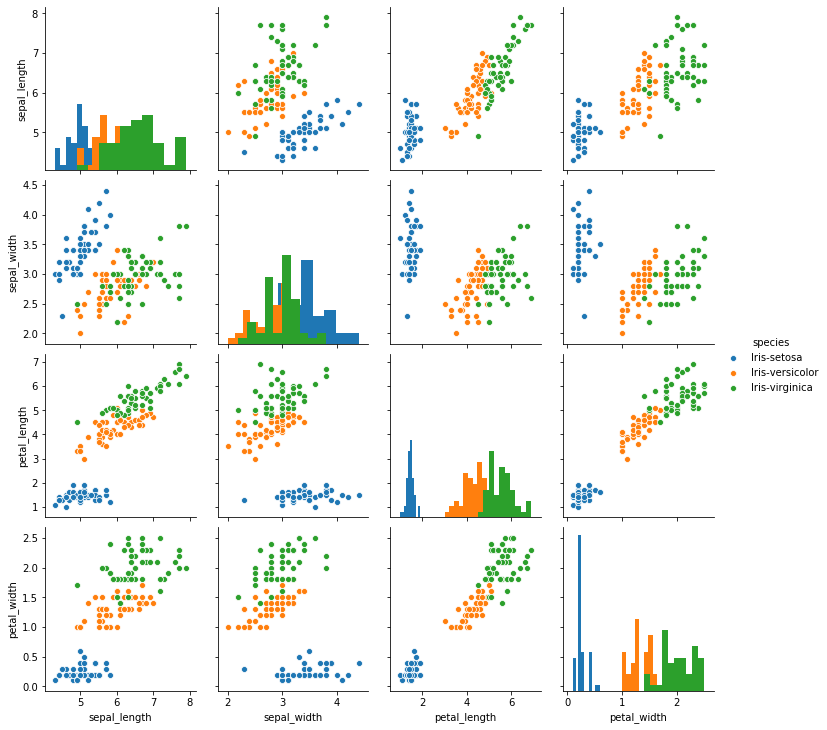

In [5]:
sns.pairplot(df, hue="species", diag_kind="hist")

In [6]:
x=df.iloc[:,:4].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
y=df.iloc[:,4]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [8]:
x.shape

(150, 4)

In [9]:
y.shape

(150,)

In [10]:
#Elbow point and visualization 
from sklearn.cluster import KMeans
Kmeans= [KMeans(n_clusters=i) for i in range(1,15)]
Kmeans

scores= [ Kmeans[i].fit(x).score(x) for i in range(len(Kmeans))]
print(scores)

[-680.8243999999996, -152.36870647733858, -78.94084142614562, -57.31787321428552, -46.5355820512821, -39.2518308926366, -34.31116758986863, -29.881402210511226, -27.977297315406467, -26.447661616161874, -24.741210230945235, -22.47428535353545, -21.908724514047734, -19.978319966582873]


In [11]:
score = np.absolute(scores)
score

array([680.8244    , 152.36870648,  78.94084143,  57.31787321,
        46.53558205,  39.25183089,  34.31116759,  29.88140221,
        27.97729732,  26.44766162,  24.74121023,  22.47428535,
        21.90872451,  19.97831997])

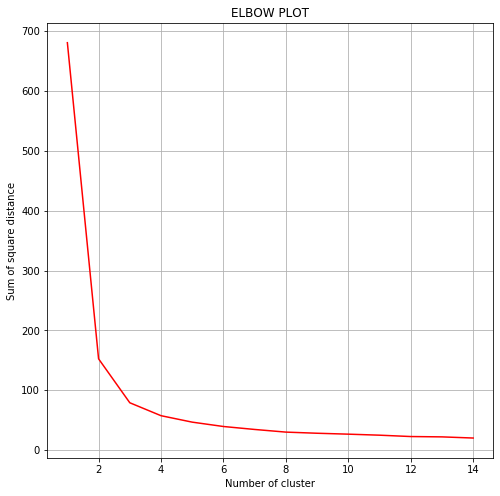

In [12]:
plt.figure(figsize= (8,8))
plt.plot(range(1,15),score,c='red')
plt.title("ELBOW PLOT")
plt.xlabel("Number of cluster")
plt.ylabel("Sum of square distance")
plt.grid()
plt.show()

From the above elbow plot it is seen that optimum no. of clusters would be three.
Now keeping n = 3

In [13]:
n=3
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)
y_pred=kmeans.fit_predict(x)


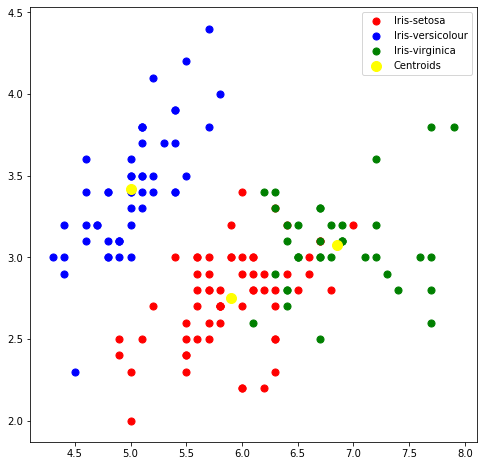

In [17]:
#Visualising plot
plt.figure(figsize=(8,8))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()